# **Hotel Booking Analysis**


The aim is to create meaningful estimators from the data set we have and to select the model that predicts the cancellation best by comparing them with the accuracy scores of different ML models and ROC Curves.

**Column information**

Hotel

        1. H1: Resort hotel
        2. H2: City hotel

is_canceled
    
        *  1: Canceled
        *  0: Not canceled


 lead_time
        
        *   No of days thaat elapsed between entering date of booking into property management system and arrival date


arrival_date_year
        
        *  Year of arrival date (2015-2017)

arrival_date_month

        *   Month of arrival date (Jan - Dec)

 arrival_date_week_numberr

        *  Week number of year for arrival date (1-53)

arrival_date_day_of_month

        *   Day of arrival date

stays_in_week_nights

        *  No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel

stays_in_week_nights

        *   No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel

*   Adults

    Children

    Babies

  meal
        *   Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one
         other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

 country

market_segment (a group of people who share one or more common characteristics, lumped together for marketing purposes)


*   TA: Travel agents

*   TO: Tour operators


distribution_channel (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)

*  TA: Travel agents
*  TO: Tour operators

is_repeated_guest (value indicating if the booking name was from repeated guest)
*   1: Yes
*   0: No

previous_cancellations

      Number of previous bookings that were cancelled by the customer prior to the current booking
previous_bookings_not_canceled

     Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type

      Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type

      Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes

      Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type

      Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

agent

      ID of the travel agency that made the booking

 company

ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

day_in_waiting_list

Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type

*   Contract - when the booking has an allotment or other type of contract associated to it;

*   Group – when the booking is associated to a group;

*   Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

*  Transient-party – when the booking is transient, but is associated to at least other transient booking

adr (average daily rate)

 average daily rate = 𝑆𝑢𝑚𝑂𝑓𝐴𝑙𝑙𝐿𝑜𝑑𝑔𝑖𝑛𝑔𝑇𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛 /𝑇𝑜𝑡𝑎𝑙𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑆𝑡𝑎𝑦𝑖𝑛𝑔𝑁𝑖𝑔ℎ𝑡
  
required_car_parking_spaces

      Number of car parking spaces required by the customer

total_of_special_requests

      Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status

*   Canceled – booking was canceled by the customer;
*   Check-Out – customer has checked in but already departed;
*   No-Show – customer did not check-in and did inform the hotel of the reason

reservation_status_date

      Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel











In [169]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [170]:
!ls "/content/gdrive/My Drive/hotel_bookings.csv"

'/content/gdrive/My Drive/hotel_bookings.csv'


In [171]:
csv_file="/content/gdrive/My Drive/hotel_bookings.csv"

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [173]:
df = pd.read_csv(csv_file)

In [174]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [175]:
df.shape

(119390, 32)

In [176]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [177]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

we have quite alot of NaN values in company and agent.Highly doubt they have an impact on the analysis and will remove the 2 columns. The reason why we can't remove rows with NaN value is because that will mean we are removing 112593 rows out of 119390 rows. So removing columns will be a better idea since those 2 attributes (agents and companies) are unimportant. This can be done using data.drop(columns = ['agent', 'company']).

In [178]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df, df['company']),
                                                                          perc_mv(df, df['agent']),
                                                                          perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


As we can see 94.3% of company column are missing values. Therefore we do not have enough values to fill the rows of company column by predicting, filling by mean etc. It seems that the best option is dropping company column.

In [179]:
df = df.drop(['company'], axis = 1)

In [180]:
df['children'] = df['children'].fillna(0)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**## Now we have 31 columns with equal data i.e. 119300**





**We should check the features to create some more meaningful variables and reduce the number of features if it is possible.**

In [182]:
data=df.copy()

**I label them manually and the rest with get.dummies or label_encoder.**

In [183]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [184]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [185]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

data = feature(data)

In [186]:
# Information of these columns is also inside of new features, so it is better to drop them.
# I did not drop stays_nights features, I can't decide which feature is more important there.
data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

After correlation we will decide what to do about country, agent and total_nights.

### **Correlation**

In [187]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [188]:
cor_data = data.copy()

In [189]:
le = LabelEncoder()

In [190]:
 #This data will not be used while predicting cancellation. This is just for checking correlation.
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [191]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,0.083795,0.174419,-0.050421,-0.012292,-0.004441,-0.249677,-0.307834,-0.072820,-0.158500,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,0.059338,0.167600,-0.084793,0.110133,-0.057358,-0.061282,-0.176028,-0.144381,-0.127883,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,0.013797,0.220414,-0.124410,0.086042,-0.073548,-0.106089,-0.172219,0.000149,-0.171430,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,0.107697,0.022644,0.010341,-0.119822,0.029218,0.092809,0.036141,0.030872,-0.017723,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,0.001293,0.007381,-0.030729,0.037479,-0.021640,-0.007923,-0.006378,0.004809,-0.000799,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,-0.000510,0.005699,-0.030131,0.035501,-0.020904,-0.007997,-0.005684,0.005508,0.001638,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,-0.004088,0.001578,-0.006145,-0.027011,-0.000300,0.016929,0.011646,0.010613,-0.002271,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,0.115350,0.093097,-0.087239,-0.012775,-0.042715,0.142083,0.086643,0.063281,-0.110284,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,0.108569,0.087185,-0.097245,-0.013992,-0.048743,0.168616,0.100795,0.096209,-0.110354,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,0.145132,0.116957,-0.057009,-0.003772,-0.040417,-0.120749,-0.120792,0.024650,-0.095428,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


Above table represents the correlation of attributes with other attributes. 

In [192]:

cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.127883
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

As we can see in the sorted list, reservation_status seems to be most impactful feature. With that information accuracy rate should be really high. It can be better to drop reservation_status column to see how other features can predict. I am going to try both.

Apart from that, I will not use arrival_date_week_number, stays_in_weekend_nights and arrival_date_day_of_month since their importances are really low while predicting cancellations.

Also, still we have some missing values in agent column. It has nice importance on predicting cancellation but since the missing values are equal to 13% of the total data it is better to drop that column. It has a lot of class inside of it otherwise we could try predicting missing values but they may misguide the predictions.

In [193]:

cor_data.corr()['stays_in_week_nights']

hotel                            -0.234020
is_canceled                       0.024765
lead_time                         0.165799
arrival_date_year                 0.030883
arrival_date_month                0.019212
arrival_date_week_number          0.015558
arrival_date_day_of_month        -0.028174
stays_in_weekend_nights           0.498969
stays_in_week_nights              1.000000
meal                              0.036742
market_segment                    0.108569
distribution_channel              0.087185
is_repeated_guest                -0.097245
previous_cancellations           -0.013992
previous_bookings_not_canceled   -0.048743
reserved_room_type                0.168616
assigned_room_type                0.100795
booking_changes                   0.096209
agent                            -0.110354
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr                               0.065237
required_car_parking_spaces      -0.024859
total_of_sp

In [194]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

**Lets delete the NA rows of country column**

In [195]:
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

#There is no missing value in the data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

**Since we have decided what to do with features and missing values, we can work on first data.**

In [196]:
indices = data.loc[pd.isna(data["country"]), :].index 
data = data.drop(data.index[indices])   
data = data.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [197]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [198]:
df1 = data.copy()

In [199]:
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [200]:
df1['country'] = le.fit_transform(df1['country'])

There are more than 300 classes, so I wanted to use label encoder on this feature.

## **Decision Tree Model (reservation_status included)**

In [201]:
y = df1["is_canceled"]
X = df1.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [202]:
cart = DecisionTreeClassifier(max_depth = 12)

cart_model = cart.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)

In [203]:
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


In the correlation part, we have seen the impact of reservation status. Reservation status dominates other features totally. By keeping reservation_status in data, it is possible to achieve 100% accuracy rate because that feature is direct way to predict cancellations, its like cheating. For the sake of analysis I will drop reservation_status and continue analysis without it.

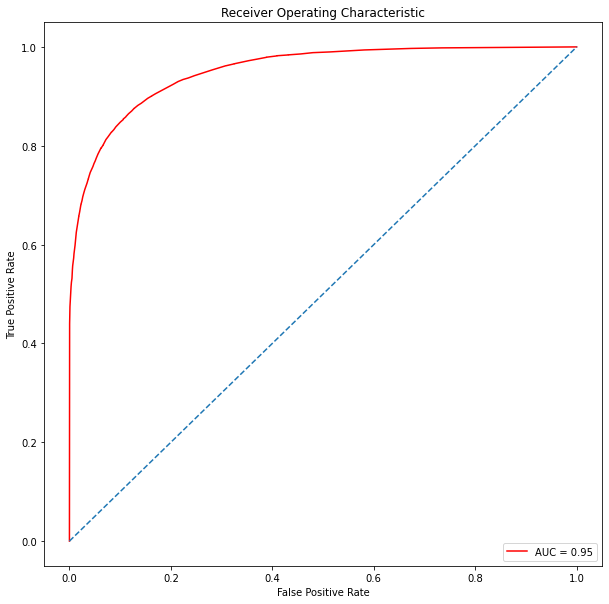

In [204]:
ROC(y_test, y_prob)


When the variable under study cannot distinguish between the two groups, i.e. where there is no difference between the two distributions, the area will be equal to 0.5 (the ROC curve will coincide with the diagonal). When there is a perfect separation of the values of the two groups, i.e. there no overlapping of the distributions, the area under the ROC curve equals 1 (the ROC curve will reach the upper left corner of the plot).
The 95% Confidence Interval is the interval in which the true (population) Area under the ROC curve lies with 95% confidence.

In [205]:
df2 = df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)

In [206]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [207]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [208]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.8041266014409464

Confusion Matrix:
 [[20476  1877]
 [ 5110  8208]]


In [209]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7692639068322691


Best cross-validation score: 0.76

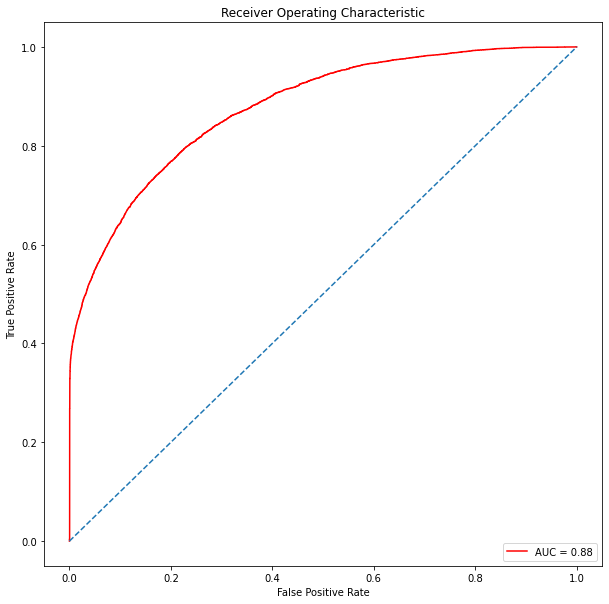

In [210]:
ROC(y_test, y_prob)

In [211]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9604 12749]
 [ 2010 11308]]


In [212]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.5624280984012298


Best cross-validation score: 0.56

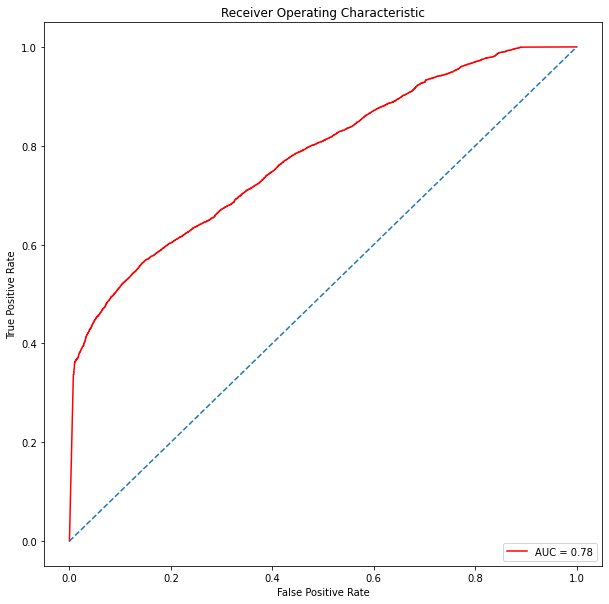

In [213]:
ROC(y_test, y_prob)

In [214]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8849205236746938

Confusion Matrix:
 [[20959  1394]
 [ 2711 10607]]


In [215]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6729233258023877


Best cross-validation score: 0.67

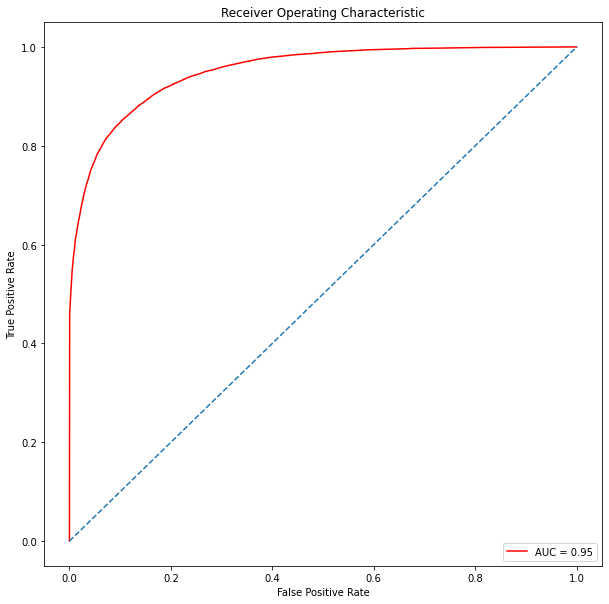

In [216]:
ROC(y_test, y_prob)

When the variable under study cannot distinguish between the two groups, i.e. where there is no difference between the two distributions, the area will be equal to 0.5 (the ROC curve will coincide with the diagonal). When there is a perfect separation of the values of the two groups, i.e. there no overlapping of the distributions, the area under the ROC curve equals 1 (the ROC curve will reach the upper left corner of the plot).
The 95% Confidence Interval is the interval in which the true (population) Area under the ROC curve lies with 95% confidence.

## **Different models on data-**

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?
Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−ŷ i|

Mean Squared Error (MSE) is the mean of the squared errors:

1n∑i=1n(yi−ŷ i)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

√1n∑i=1n(yi−ŷ i)2





In [217]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [218]:
data=df.copy()

In [219]:
X = data.drop(['previous_cancellations'], axis = 1)
y = data['previous_cancellations']

Our Target is y with previous_cancellations, & X contains all the data except previous_cancellation with below codes we will train_test_split the data

In [220]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [221]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

print('Mean Absolute Error_lng:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lng:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lng:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lng:', r2_score(y_test, y_pred).round(3))


Mean Absolute Error_lng: 0.19
Mean Squared Error_lng: 0.661
Root Mean Squared Error_lng: 0.813
r2_score_lng: 0.063


## **Lower values of RMSE indicate better fit. So Ridge Regression is not the best model to predict the output.**

In [223]:
X.shape

(119390, 30)

In [224]:
y.shape

(119390,)

In [225]:
y_pred = regressor.predict(X_test)

In [226]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
5627,0,0.267721
119322,0,-0.174234
75310,1,0.537058
90032,0,-0.042960
75368,1,0.513976
...,...,...
9687,0,0.052800
1053,0,0.095290
34861,0,-0.228904
88285,0,0.240167


### **Though our model is very precise, the predicted percentages are close to the actual ones.**



**Ridge Regression**

In [227]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) #training the algorithm

y_pred = ridge.predict(X_test)

print('Mean Absolute Error_ridge:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_ridge:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_ridge:', r2_score(y_test, y_pred).round(3))


Mean Absolute Error_ridge: 0.19
Mean Squared Error_ridge: 0.661
Root Mean Squared Error_ridge: 0.813
r2_score_ridge: 0.063


Lower values of RMSE indicate better fit. So Ridge Regression is not the best model to predict the output.

## **Logistic Regression**

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [229]:
d1f = pd.read_csv(csv_file)
df1 = df.iloc[0:2999]
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [230]:
df_new = df1.copy()[['required_car_parking_spaces','lead_time','booking_changes','adr','adults', 'is_canceled']]
df_new.head()

,required_car_parking_spaces,lead_time,booking_changes,adr,adults,is_canceled
0,0,342,3,0.0,2,0
1,0,737,4,0.0,2,0
2,0,7,0,75.0,1,0
3,0,13,0,75.0,1,0
4,0,14,0,98.0,2,0


In [231]:
x = df_new.drop(['is_canceled'], axis=1)
y = df_new['is_canceled']

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [233]:
model_LogReg_Asli= LogisticRegression()
model_LogReg_Asli.fit(x_train, y_train)
print(model_LogReg_Asli.coef_)
print(model_LogReg_Asli.intercept_)

m=model_LogReg_Asli.coef_[0][0]
c=model_LogReg_Asli.intercept_[0]

[[-4.05812101  0.0065949  -0.77725534  0.00978826  0.08451063]]
[-2.01165506]


In [234]:
y_pred_lr=model_LogReg_Asli.predict(x_test)

In [235]:
model_LogReg_Asli.score(x_train,y_train)

0.68528553563985

In [236]:
model_LogReg_Asli.score(x_test,y_test)

0.6933333333333334

In [237]:
confusion_matrix(y_test,y_pred_lr)

array([[411,   1],
       [183,   5]])

In [238]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       412
           1       0.83      0.03      0.05       188

    accuracy                           0.69       600
   macro avg       0.76      0.51      0.43       600
weighted avg       0.74      0.69      0.58       600



## **As you can see above, the Logistic Regression model has about 69.3 percent of accuracy.**

## **We can inprove the accuracy of the model by considering more parameters insisted of these 5.**

### **competitive summary**

In [243]:
table = pd.DataFrame({"Model": ["Decision Tree (reservation status included)", "Logistic Regression",
                                "Naive Bayes", "Decision Tree(reservation status excluded)", "Random Forest"],
                              
                     "Accuracy Scores": ["1", "0.804", "0.582", "0.82", "0.851"],
                     "ROC | Auc": ["1", "0.88", "0.78","0.76" ,"0"]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")
table["ROC | Auc"] = table["ROC | Auc"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores,ROC | Auc
Model,,
Decision Tree (reservation status included),1.000,1.00
Random Forest,0.851,0.00
Decision Tree(reservation status excluded),0.820,0.76
Logistic Regression,0.804,0.88
Naive Bayes,0.582,0.78


## **Random forest model has the highest  score. In addition, it also has the highest Best cross-validation score-- 0.8617. Therefore, Random forest model is the best option.**

## **Summary -**

1. As we can see from the summary table, the best algorithm is random forest for this data set.
2. 0 values are uncalculated ones.
3. We do not count decision tree with reservatiton status which is broken. All algorithms would give 100% accuracy scores while reservation status is included.